## Линейная регрессия с использованием градиентного спуска
Цели:
- Научиться работать с простейшей моделью машинного обучения — линейной регрессией.
- Изучить алгоритм градиентного спуска.
- Реализовать линейную регрессию и визуализировать результаты на графиках.
- Построить функцию потерь и понять, как она изменяется при обновлении параметров модели.

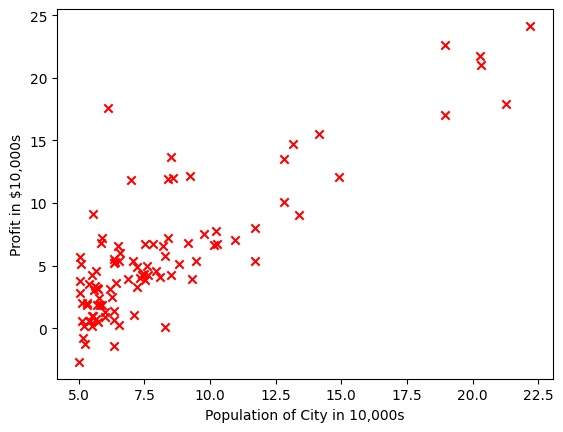

Initial cost: 32.072733877455676
Theta: [-3.63029144  1.16636235]


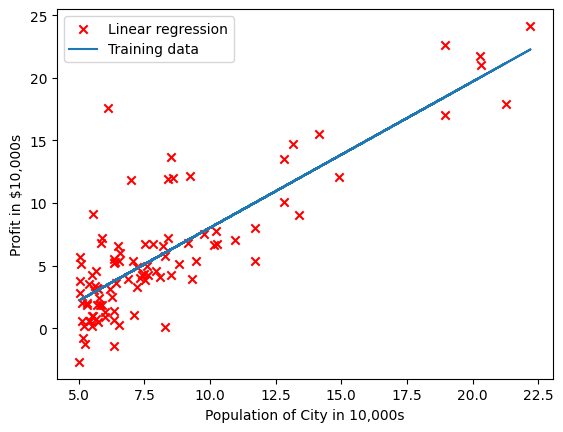

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()

def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sq_errors)

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha / m) * X.T.dot(error)
    return theta

# Основной код
data = pd.read_csv('data1.txt', header=None)
X = data[0]
y = data[1]
m = len(y)
X = np.vstack([np.ones(m), X]).T
theta = np.zeros(2)

# Построение графика исходных данных
plotData(data[0], data[1])

# Вычисление начальной стоимости
cost = computeCost(X, y, theta)
print(f"Initial cost: {cost}")

# Настройка параметров для градиентного спуска
iterations = 1500
alpha = 0.01

# Запуск градиентного спуска
theta = gradientDescent(X, y, theta, alpha, iterations)
print(f"Theta: {theta}")

# Визуализация линейной регрессии
plt.scatter(X[:, 1], y, marker='x', c='r')
plt.plot(X[:, 1], X.dot(theta), '-')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Linear regression", "Training data"])
plt.show()


## Визуализация функции ошибки на графике:
После завершения градиентного спуска постройте график изменения функции стоимости по итерациям. Это поможет увидеть, как уменьшается ошибка с каждой итерацией.

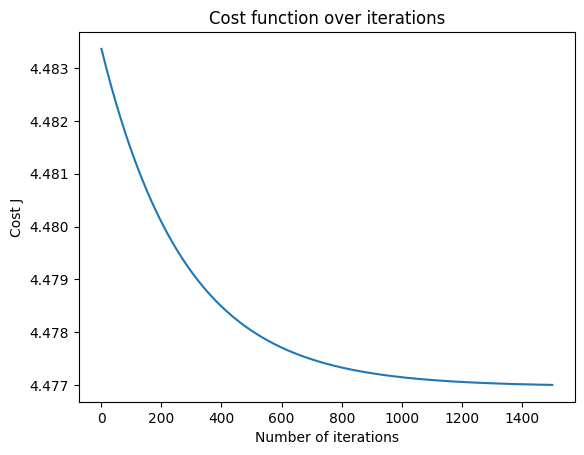

In [2]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha / m) * X.T.dot(error)
        J_history.append(computeCost(X, y, theta))  # сохраняем значение функции стоимости
        
    return theta, J_history

# Основной код
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Построение графика изменения функции стоимости
plt.plot(range(1, iterations + 1), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost function over iterations')
plt.show()


3D-график функции ошибки для различных комбинаций θ0 и θ1:

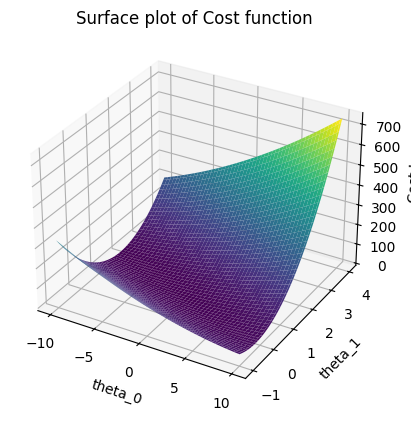

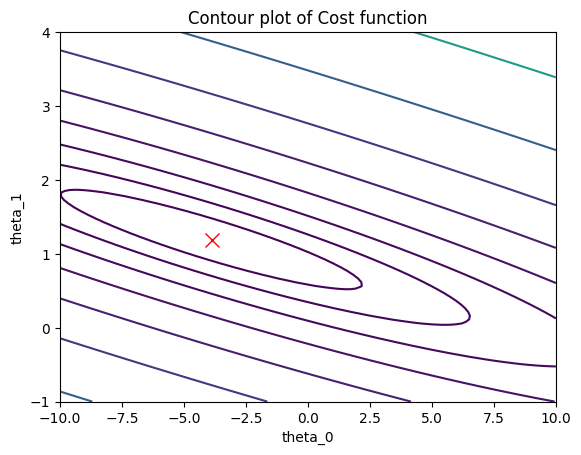

In [18]:
# Задаем диапазон значений для θ0 и θ1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Инициализируем матрицу для значений J(θ)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Вычисляем J(θ) для каждой комбинации θ0 и θ1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)

# Транспонируем J_vals для корректного отображения
J_vals = J_vals.T

# 3D-график
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta0_vals_grid, theta1_vals_grid = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals_grid, theta1_vals_grid, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.title('Surface plot of Cost function')
plt.show()

# Контурная карта
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.title('Contour plot of Cost function')
plt.show()


# Модифицированный код с использованием scikit-learn

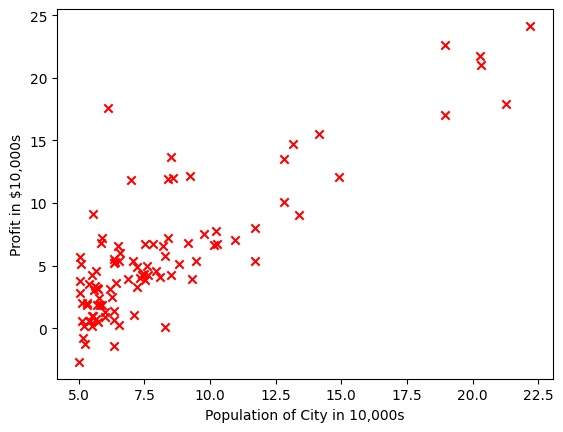

Theta 0 (intercept): -3.895780878311852
Theta 1 (slope): 1.1930336441895937


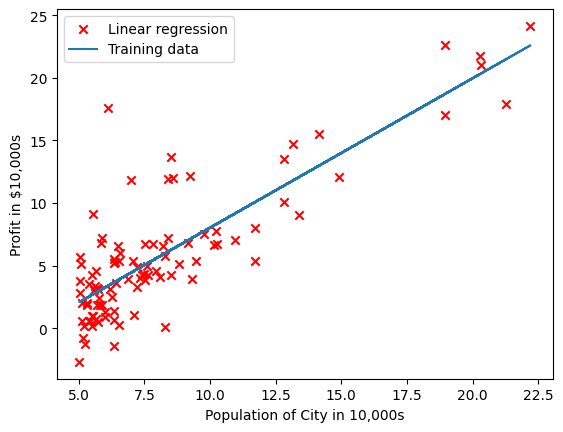

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()

# Основной код
data = pd.read_csv('data1.txt', header=None)
X = data[0].values.reshape(-1, 1)  # Переводим X в двумерный массив для sklearn
y = data[1].values

# Построение графика исходных данных
plotData(X, y)

# Используем встроенную линейную регрессию
model = LinearRegression()
model.fit(X, y)

# Параметры (θ0 и θ1)
theta_0 = model.intercept_
theta_1 = model.coef_[0]
print(f"Theta 0 (intercept): {theta_0}")
print(f"Theta 1 (slope): {theta_1}")

# Прогнозируем значения y на основе модели
y_pred = model.predict(X)

# Визуализация линейной регрессии
plt.scatter(X, y, marker='x', c='r')
plt.plot(X, y_pred, '-')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Linear regression", "Training data"])
plt.show()


## Лабораторная работа
1. Ознакомьтесь с кодом выше, попробуйте изменить параметры:
- число данных;
- шаг обучения (learning rate, alpha);
- число итерация сходимости функции ошибки (cost function);
- коэффициенты обучения θ0 и θ1
<p> Приведите самые интересные на Ваш взгляд графики изменения обучения, прокомментируйте результаты.
2. Примените модель линейной регрессии на новых данных, файл Salary_Data.xls. Файл Salary_Data.xls откройте и прочитайте с помощью Pandas, постройте графики:
- зависимость зарплаты от стажа работы
- график функции ошибки
- представьте результат обучения линейной регреции
- *посмотрите контурную карту обучения параметро θ0 и θ1
3. Предоставить решение задачи линейной регрессии с одной переменной с помощью библиотеки scikit-learn, объяснить решение.

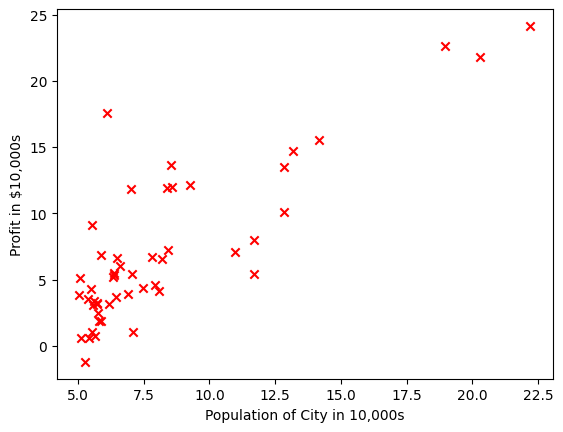

Initial cost: 11.527403495417
Theta: [-2.51874766  1.18396441]


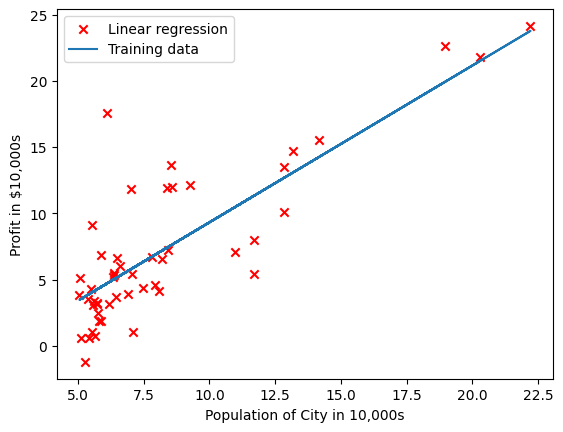

In [11]:
#1#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()

def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sq_errors)

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha / m) * X.T.dot(error)
    return theta

# Основной код
data = pd.read_csv('data1.txt', header=None,nrows=50)       ###
X = data[0]
y = data[1]
m = len(y)
X = np.vstack([np.ones(m), X]).T
#theta = np.zeros(2)
theta = np.array([5, 0.5])                              ###

# Построение графика исходных данных
plotData(data[0], data[1])

# Вычисление начальной стоимости
cost = computeCost(X, y, theta)
print(f"Initial cost: {cost}")

# Настройка параметров для градиентного спуска
iterations = 1500                                       ###
alpha = 0.01                                            ###

# Запуск градиентного спуска
theta = gradientDescent(X, y, theta, alpha, iterations)
print(f"Theta: {theta}")

# Визуализация линейной регрессии
plt.scatter(X[:, 1], y, marker='x', c='r')
plt.plot(X[:, 1], X.dot(theta), '-')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend(["Linear regression", "Training data"])
plt.show()

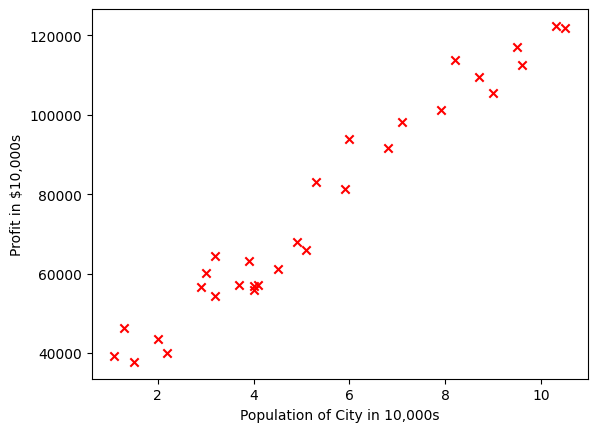

Initial cost: 3251477635.366667
Theta: [24796.02161349  9597.79105292]


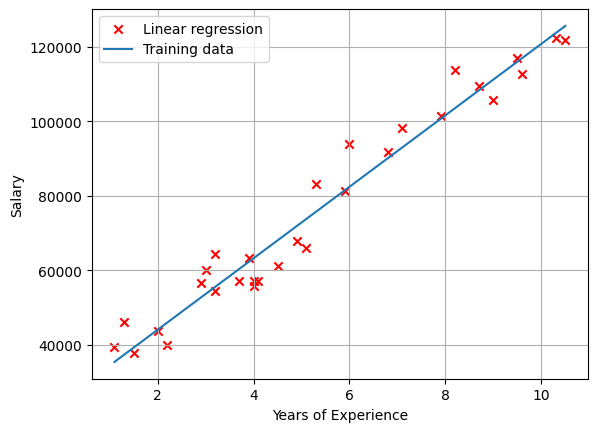

In [16]:
#2#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из Excel файла
data = pd.read_excel('Salary_Data.xls')

# Построение графика зависимости зарплаты от стажа работы
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.show()

def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sq_errors)

def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha / m) * X.T.dot(error)
        
    return theta

# Преобразуем данные
X = data['YearsExperience'].values  # Стаж работы (признак)
y = data['Salary'].values  # Зарплата (целевая переменная)
m = len(y)
X = np.vstack([np.ones(m), X]).T
theta = np.zeros(2)

plotData(data['YearsExperience'], data['Salary'])

cost = computeCost(X, y, theta)
print(f"Initial cost: {cost}")

# Настройка параметров для градиентного спуска
iterations = 1500
alpha = 0.01

# Запуск градиентного спуска
theta = gradientDescent(X, y, theta, alpha, iterations)
print(f"Theta: {theta}")

# Визуализация линейной регрессии
plt.scatter(X[:, 1], y, marker='x', c='r')
plt.plot(X[:, 1], X.dot(theta), '-')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(["Linear regression", "Training data"])
plt.grid(True)
plt.show()

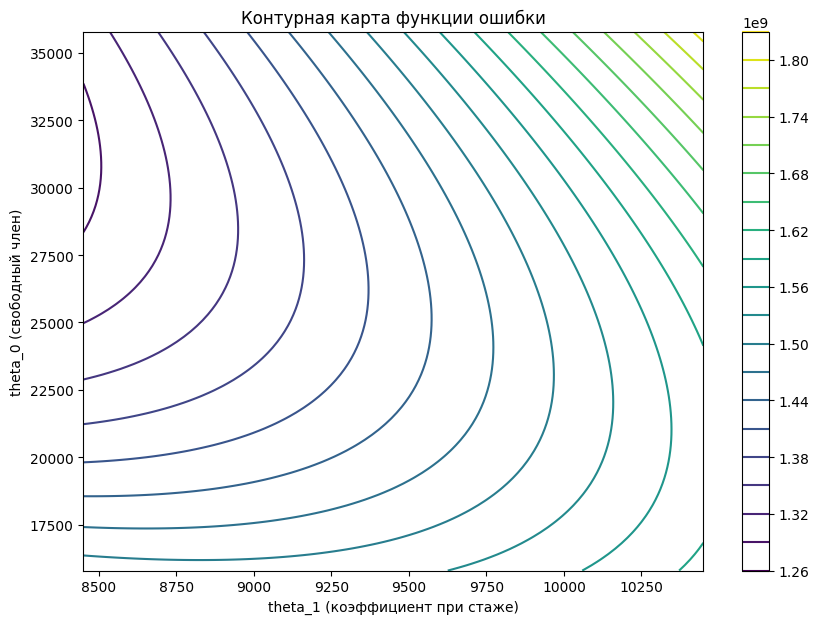

In [ ]:
#*#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных из файла Excel
data = pd.read_excel('Salary_Data.xls')

# Разделим данные на вход (X) и выход (y)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)  # обучает модель

# Коэффициенты модели
theta_0 = model.intercept_  # свободного члена (θ₀) линейной регрессии.
theta_1 = model.coef_[0] # коэффициента при стаже (θ₁) линейной регрессии.


# Установим диапазоны для theta_0 и theta_1
theta_0_range = np.linspace(theta_0 - 10000, theta_0 + 10000, 100)  # Около реального theta_0
theta_1_range = np.linspace(theta_1 - 1000, theta_1 + 1000, 100)    # Около реального theta_1

# Массив для ошибок
J_values = np.zeros((len(theta_0_range), len(theta_1_range)))

# Вычисление ошибки для каждого сочетания значений theta_0 и theta_1
for i, theta_0_val in enumerate(theta_0_range):
    for j, theta_1_val in enumerate(theta_1_range):
        # Предсказания модели для текущих значений theta_0 и theta_1
        predictions = theta_0_val + theta_1_val * X
        # Среднеквадратичная ошибка
        J_values[i, j] = np.mean((predictions - y) ** 2)

# Построение графика функции ошибки с линейными уровнями
plt.figure(figsize=(10, 7))

contour = plt.contour(theta_1_range, theta_0_range, J_values, levels=20, cmap='viridis')
plt.xlabel('theta_1 (коэффициент при стаже)')
plt.ylabel('theta_0 (свободный член)')
plt.title('Контурная карта функции ошибки')
plt.colorbar(contour)
plt.show()


Параметр θ0 (свободный член): 25792.20019866871
Параметр θ1 (коэффициент при стаже): 9449.962321455074


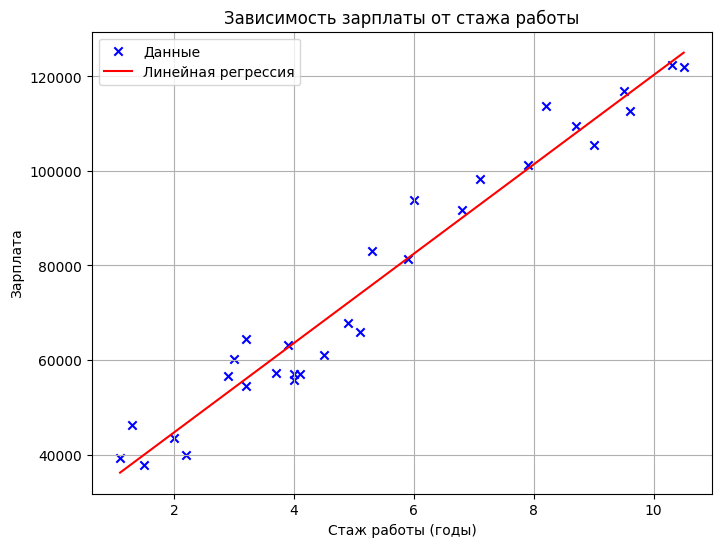

In [2]:
#3#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Чтение данных из файла
data = pd.read_excel('Salary_Data.xls')

# 2. Подготовка данных: переменная X — стаж работы, y — зарплата
X = data['YearsExperience'].values.reshape(-1, 1)  # Признак, 2D массив
y = data['Salary'].values  # Целевая переменная, 1D массив

# 3. Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# 4. Получаем параметры модели (θ0 и θ1)
theta0 = model.intercept_
theta1 = model.coef_[0]

print(f'Параметр θ0 (свободный член): {theta0}')
print(f'Параметр θ1 (коэффициент при стаже): {theta1}')

# 5. Предсказания модели
y_pred = model.predict(X)

# 6. Визуализация результатов
# 6.1. График зависимости зарплаты от стажа
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue',marker = 'x', label='Данные')
plt.plot(X, y_pred, color='red', label='Линейная регрессия')
plt.title('Зависимость зарплаты от стажа работы')
plt.xlabel('Стаж работы (годы)')
plt.ylabel('Зарплата')
plt.legend()
plt.grid(True)
plt.show()



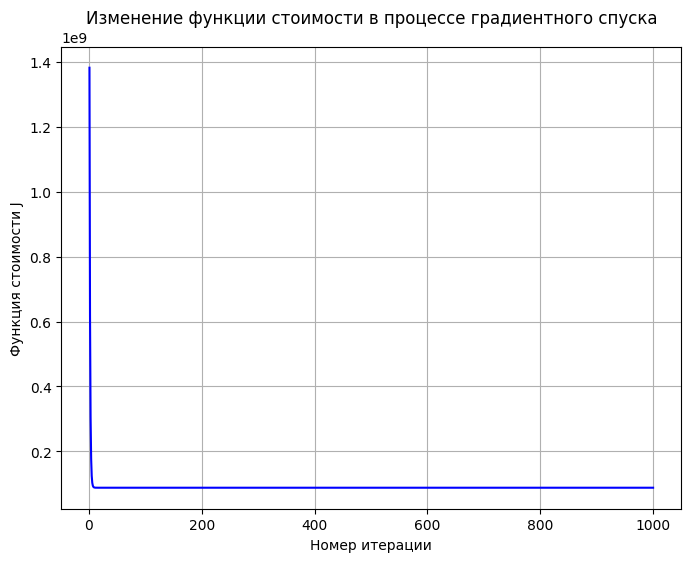

In [5]:
# Функция для вычисления стоимости (ошибки) модели
def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sq_errors)

# Функция градиентного спуска
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []  # Список для хранения истории значений функции стоимости
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta -= (alpha / m) * X.T.dot(error)
        J_history.append(computeCost(X, y, theta))  # сохраняем стоимость после каждого шага
        
    return theta, J_history

# Инициализация параметров
iterations = 1500  # Количество итераций
alpha = 0.01       # Скорость обучения
theta = np.zeros(X.shape[1])  # Инициализация параметров (θ0 и θ1)

# Запуск градиентного спуска
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# Построение графика изменения функции стоимости
plt.figure(figsize=(8,6))
plt.plot(range(1, iterations + 1), J_history, color='blue')
plt.xlabel('Номер итерации')
plt.ylabel('Функция стоимости J')
plt.title('Изменение функции стоимости в процессе градиентного спуска')
plt.grid(True)
plt.show()